# (Prosper Loan Data Exploration)
## by (Abdulellah Al-hudaithy)

## Preliminary Wrangling

> This document explores a loan dataset containing loan attributes such as loan amount, interest rate, current loan status, etc. for approximately 114,000 loans

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
df = pd.read_csv('prosperLoanData.csv')
print(df.shape)
df.sample(5)

(113937, 81)


,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
91888,76D43369163025285104286,39286,2006-09-13 22:00:22.983000000,C,36,Completed,2009-12-01 00:00:00,0.18726,0.1800,0.1750,...,-37.26,-41.77,0.0,0.0,0.0,1.0,0,0,0.0,84
13646,07353594159636788A0E110,1030866,2013-11-11 10:07:06.900000000,NaN,60,Current,NaN,0.22908,0.2045,0.1945,...,-24.96,0.00,0.0,0.0,0.0,1.0,0,0,0.0,1
65215,B36A3565604379467B0E0A9,682124,2012-12-04 21:27:41.110000000,NaN,36,Current,NaN,0.21025,0.1734,0.1634,...,-144.55,0.00,0.0,0.0,0.0,1.0,0,0,0.0,225
92518,80413418468331155CF785A,313036,2008-04-17 16:42:16.597000000,C,36,Completed,2011-03-31 00:00:00,0.17322,0.1515,0.1415,...,-82.43,0.00,0.0,0.0,0.0,1.0,0,0,0.0,100
57166,9AE733814733548133C55BA,100079,2007-02-15 14:01:33.080000000,C,36,Completed,2007-06-19 00:00:00,0.14809,0.1410,0.1260,...,-27.70,0.00,0.0,0.0,0.0,1.0,0,0,0.0,288


In [3]:
df.info()
# Note: there are a lot of attributes has missing values so i will select 10-15 attribues to clean and explore them 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [4]:
new_df =  df[['ListingCreationDate','Term', 'LoanStatus', 'BorrowerAPR', 'BorrowerRate', 'EstimatedEffectiveYield', 'EstimatedLoss', 'EstimatedReturn',
            'ProsperRating (numeric)', 'ProsperRating (Alpha)', 'ProsperScore', 'BorrowerState','Occupation','EmploymentStatus',
            'LoanOriginalAmount','IncomeRange','StatedMonthlyIncome', 'MonthlyLoanPayment', ]].copy()

In [5]:
new_df.sample(5)

,ListingCreationDate,Term,LoanStatus,BorrowerAPR,BorrowerRate,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,BorrowerState,Occupation,EmploymentStatus,LoanOriginalAmount,IncomeRange,StatedMonthlyIncome,MonthlyLoanPayment
102229,2007-01-14 18:20:42.747000000,36,Chargedoff,0.29776,0.2900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other,Not available,2550,Not displayed,1194.166667,106.86
84103,2011-08-03 08:17:12.687000000,36,Completed,0.34887,0.3125,0.28480,0.1700,0.11480,1.0,HR,3.0,MN,Analyst,Employed,4000,"$75,000-99,999",6750.000000,172.56
3304,2013-11-06 14:01:29.047000000,36,Current,0.19501,0.1585,0.14008,0.0574,0.08268,5.0,B,5.0,WI,Other,Employed,7000,"$50,000-74,999",6083.333333,245.58
36850,2013-05-18 12:36:39.350000000,36,Current,0.15833,0.1299,0.11480,0.0399,0.07490,6.0,A,9.0,NY,Professional,Employed,15000,"$100,000+",10000.000000,505.34
29303,2013-07-30 18:00:23.327000000,60,Current,0.30748,0.2809,0.24730,0.1225,0.12480,2.0,E,2.0,MD,Medical Technician,Employed,4000,"$50,000-74,999",5166.666667,124.76


In [6]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 18 columns):
ListingCreationDate        113937 non-null object
Term                       113937 non-null int64
LoanStatus                 113937 non-null object
BorrowerAPR                113912 non-null float64
BorrowerRate               113937 non-null float64
EstimatedEffectiveYield    84853 non-null float64
EstimatedLoss              84853 non-null float64
EstimatedReturn            84853 non-null float64
ProsperRating (numeric)    84853 non-null float64
ProsperRating (Alpha)      84853 non-null object
ProsperScore               84853 non-null float64
BorrowerState              108422 non-null object
Occupation                 110349 non-null object
EmploymentStatus           111682 non-null object
LoanOriginalAmount         113937 non-null int64
IncomeRange                113937 non-null object
StatedMonthlyIncome        113937 non-null float64
MonthlyLoanPayment         113937 non-n

In [7]:
# Change some data types to be more appropriate
# ListingCreationDate from object AKA string to datetime
new_df['ListingCreationDate'] = pd.to_datetime(new_df['ListingCreationDate'])

# Occupation and EmploymentStatus from object AKA string to category
new_df['LoanStatus'] = new_df.LoanStatus.astype('category')
new_df['EmploymentStatus'] = new_df.EmploymentStatus.astype('category')
new_df['ProsperRating (Alpha)'] = new_df['ProsperRating (Alpha)'].astype('category')

In [8]:
sum(new_df.duplicated()) # to see if there is any duplicate row

0

In [9]:
# Replace the null values with 'N/A' so its will not affect when i drop the data before July 2009
new_df['BorrowerState'].fillna('N/A', inplace = True)
new_df['Occupation'].fillna('N/A', inplace = True)
new_df['EmploymentStatus'] = new_df['EmploymentStatus'].cat.add_categories('N/A')
new_df['EmploymentStatus'].fillna('N/A', inplace = True)

In [10]:
# based on Prosper Loan Data - Variable Definitions file there are a lot of variables collected after July 2009 so I will
# explore the loan after July 2009 before that I will drop them
new_df.dropna(axis = 0, inplace = True)

In [11]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84853 entries, 1 to 113936
Data columns (total 18 columns):
ListingCreationDate        84853 non-null datetime64[ns]
Term                       84853 non-null int64
LoanStatus                 84853 non-null category
BorrowerAPR                84853 non-null float64
BorrowerRate               84853 non-null float64
EstimatedEffectiveYield    84853 non-null float64
EstimatedLoss              84853 non-null float64
EstimatedReturn            84853 non-null float64
ProsperRating (numeric)    84853 non-null float64
ProsperRating (Alpha)      84853 non-null category
ProsperScore               84853 non-null float64
BorrowerState              84853 non-null object
Occupation                 84853 non-null object
EmploymentStatus           84853 non-null category
LoanOriginalAmount         84853 non-null int64
IncomeRange                84853 non-null object
StatedMonthlyIncome        84853 non-null float64
MonthlyLoanPayment         84853 non-

In [12]:
new_df.ListingCreationDate.min()

Timestamp('2009-07-13 18:01:24.347000')

### What is the structure of your dataset?

> There are apporixametly 114,000 loans and 81 attributes in the original dataset I have selected the data after July 2009 
(85,000 loans approx.) and I have choice 16 varibales ( ListingCreationDate, Term, LoanStatus, BorrowerAPR, BorrowerRate,	EstimatedEffectiveYield, EstimatedLoss, EstimatedReturn, ProsperRating (numeric), ProsperRating (Alpha), ProsperScore,	BorrowerState, Occupation, EmploymentStatus, IncomeRange, LoanOriginalAmount, and MonthlyLoanPayment) most of them are numeric and some are categorical variables.

### What is/are the main feature(s) of interest in your dataset?

> The most interesting thing that I will try to figure it out the relationship between the loan amount and the interest rate (BorrowerRate) 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I think the one I have picked but the Interest Rate (BorrowerRate) will be the most to see if its effects a lot of variables such as Term, LoanOriginalAmount,  EmploymentStatus, IncomeRange, and MonthlyLoanPayment or not.

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

> I will be starting by looking at the distribution of **Original Loan Amount**.

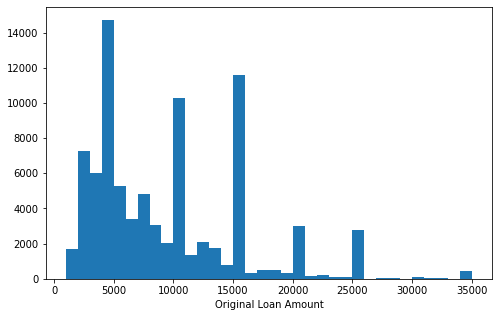

In [13]:
bins = np.arange(1000, new_df['LoanOriginalAmount'].max()+500, 1000)
plt.figure(figsize = [8,5])
plt.hist(data = new_df, x = 'LoanOriginalAmount', bins = bins);
plt.xlabel('Original Loan Amount');

In [14]:
new_df['LoanOriginalAmount'].describe()

count    84853.000000
mean      9083.440515
std       6287.860058
min       1000.000000
25%       4000.000000
50%       7500.000000
75%      13500.000000
max      35000.000000
Name: LoanOriginalAmount, dtype: float64

We can notice the distribution of Loan Original Amount looks multimodal and also we can notice that 75% of the loans are almost less than 17K, and since the loans are after the global financial crisis 2008, we could say a lot of people are afraid to take a large number of loans.

> Now I would like to look at the distributions of other variables **Interest Rate (BorrowerRate)**.

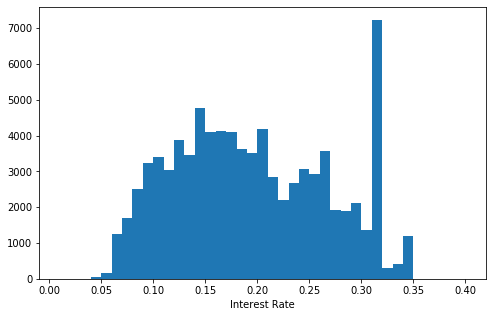

In [15]:
bins =  np.arange(0.01, new_df['BorrowerRate'].max()+0.05, 0.01 )
plt.figure(figsize = [8,5]);
plt.hist(data = new_df, x = 'BorrowerRate', bins = bins);
plt.xlabel('Interest Rate');

In [16]:
new_df['BorrowerRate'].describe()

count    84853.000000
mean         0.196022
std          0.074631
min          0.040000
25%          0.135900
50%          0.187500
75%          0.257400
max          0.360000
Name: BorrowerRate, dtype: float64

We can notice the distribution of interest rate looks multimodal. there are two lage peak at 0.23 and 0.27, there is a very shape peak between 0.32 and 0.33. there are a few more than 0.35 and less than 0.05. 

> look at the distribution of **Estimated Loss**

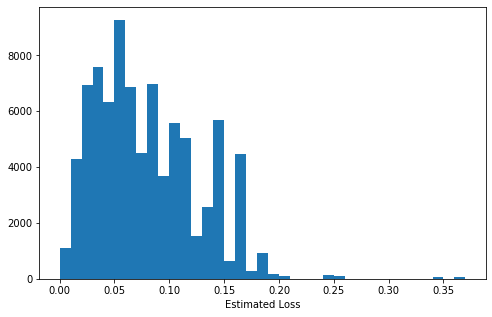

In [17]:
bins =  np.arange(0, new_df['EstimatedLoss'].max()+0.01, 0.01 )
plt.figure(figsize = [8,5]);
plt.hist(data = new_df, x = 'EstimatedLoss', bins = bins);
plt.xlabel('Estimated Loss');

In [18]:
# I will remove the outlier to see it clearly  
df2 = new_df[ new_df['EstimatedLoss'] <= 0.2]

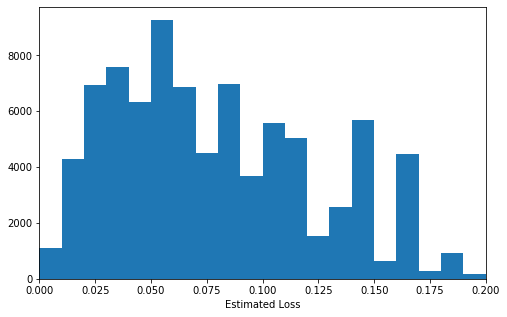

In [19]:
bins =  np.arange(0, df2['EstimatedLoss'].max()+0.05, 0.01 )
plt.figure(figsize = [8,5]);
plt.hist(data = df2, x = 'EstimatedLoss', bins = bins);
plt.xlim([0,0.2])
plt.xlabel('Estimated Loss');

In [20]:
df2['EstimatedLoss'].describe()

count    84407.000000
mean         0.079346
std          0.044789
min          0.004900
25%          0.042400
50%          0.069900
75%          0.112000
max          0.195000
Name: EstimatedLoss, dtype: float64

It also looks like a multimodal distribution, we can notice that 75% of the loans the Estimated Loss for them are less than 12.5% maybe because most of the loans are less than 25K which will not give high risk. 

> look at the distributions of **ProsperRating (Alpha)** and **Term**. 

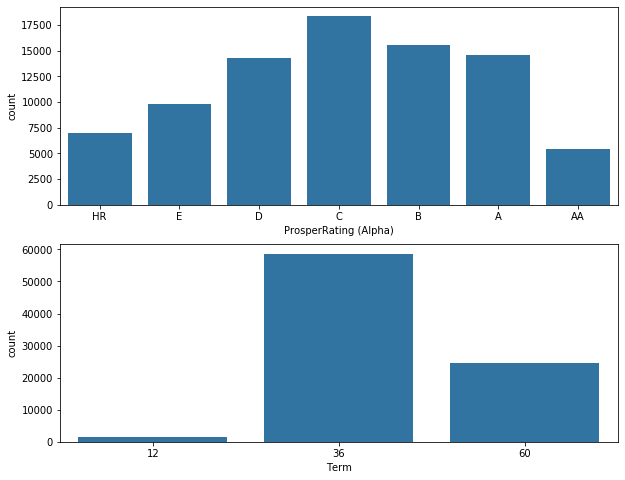

In [21]:
fig, ax = plt.subplots(nrows=2, figsize = [10,8])
color = sb.color_palette()[0]
rate_order = ['HR','E','D','C','B','A','AA']
sb.countplot(data = new_df, x = 'ProsperRating (Alpha)',order= rate_order, color = color, ax=ax[0]);
sb.countplot(data = new_df, x = 'Term', color = color, ax=ax[1]);

- Most of the people are getting ratings among D and A.
- Most of the people are choosing 36 months which is appropriate for a lot of people. 

> look at the distribution of **Employment Status**

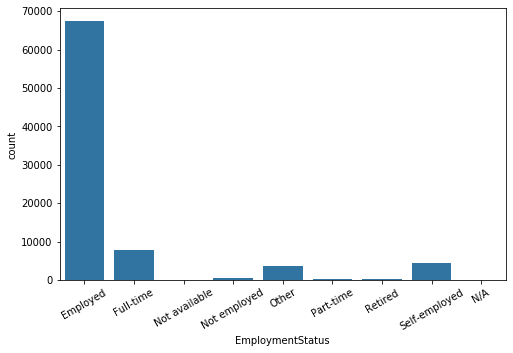

In [22]:
color = sb.color_palette()[0]
plt.figure(figsize = [8, 5])
sb.countplot(data = new_df, x = 'EmploymentStatus', color = color);
plt.xticks(rotation=30);

Most of the people are Employed and Full-time I think that so obvious because no one will take a loan and he/she hasn't income and we can see only a few people who are Not available or Not employed. 

> Look at the **Income Range** the borrowers.

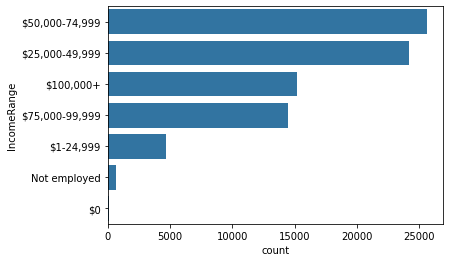

In [23]:
color = sb.color_palette()[0]
sb.countplot(data = new_df, y = 'IncomeRange', color = color);

We can see that many people who take a loan their income range is between 25K - 75K. 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The distributions in LoanOriginationDate, BorrowerRate, and EstimatedLoss looks multimodal. There are no unusual points and no need to perform any transformations.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The distribution of LoanOriginalAmount is multimodal and most of the loans are less than 17K. Most of the Interest rate (BorrowerRate) are less than 30%. The EstimatedLoss is between 0% - 20% only a few of them are greater than 25% and I think this for the large amount of loans. most of the borrowers have between 25K - 75K annual income range, only a few are less than 25k or Not employed. 

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

> I would like to start by looking at the relationship between the **Loan Original Amount** and the **Interest Rate (BorrowerRate)**

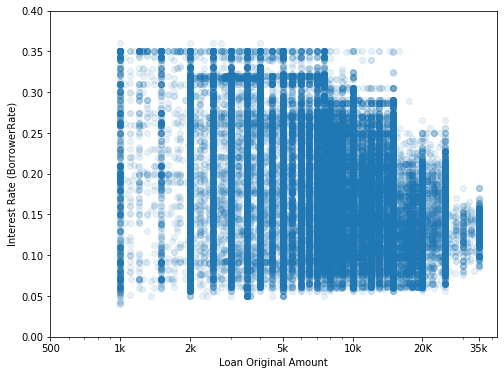

In [24]:
plt.figure(figsize = [8, 6])
plt.scatter(data = new_df, x = 'LoanOriginalAmount', y = 'BorrowerRate' , alpha = 1/10);
plt.ylim([0, 0.4])
plt.xscale('log')
plt.xticks([500, 1e3, 2e3, 5e3, 1e4, 2e4, 3.5e4], [500, '1k', '2k', '5k', '10k', '20K', '35k']);
plt.xlabel('Loan Original Amount');
plt.ylabel('Interest Rate (BorrowerRate)');

We can notice there is a reverse relationship, so when the **Loan Original Amount** increase the **interest rate (BorrowerRate)** will decrease and quite the opposite. 

> Now Let's see **BorrowerAPR** with **Loan Original Amount** if its the same or not usnign *Seaborn* library. 

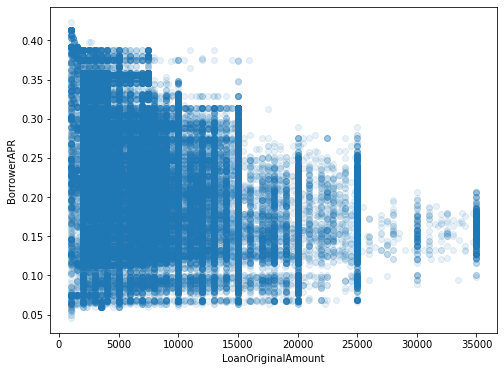

In [25]:
plt.figure(figsize = [8, 6])
sb.regplot(data = new_df, x = 'LoanOriginalAmount', y = 'BorrowerAPR', fit_reg = False, scatter_kws = {'alpha' : 1/10});

Its looks very similar to the **Loan Original Amount** and **interest rate (BorrowerRate)** relationship which is inverse relationship.

> Now I would like to look at the number of loans and Average Stated Monthly Income Top 10 state in each

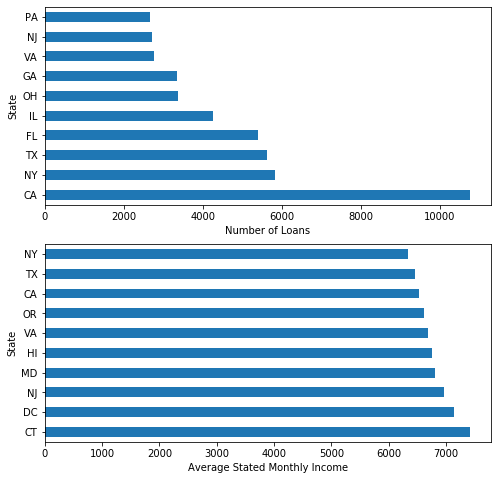

In [26]:
plt.figure(figsize=[8, 8]);
plt.subplot(2, 1, 1)
new_df['BorrowerState'].value_counts().sort_values(ascending=False)[:10].plot(kind = 'barh');
plt.xlabel('Number of Loans')
plt.ylabel('State')
plt.subplot(2, 1, 2)
new_df.groupby('BorrowerState').StatedMonthlyIncome.mean().sort_values(ascending=False)[:10].plot(kind='barh');
plt.xlabel('Average Stated Monthly Income')
plt.ylabel('State')
plt.show()

We can notice when we look at the two charts there are only 5 states who appear in both, so that means there are five states who take high numbers of loans and their average monthly income is more than 6K dollars. And we can see the number of loans in California (CA) is more than 10K and their Average Monthly Loan Payment is $6500 approx. so we could say that California (CA) is a very expensive state and there are a lot of people who take a loan.

>I would like to comparing the **ProsperRating (Alpha)** wiht **Term** and **EmploymentStatus**. 

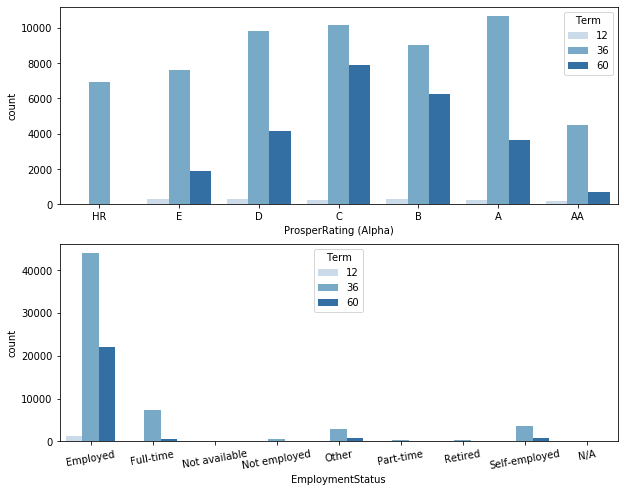

In [27]:
plt.figure(figsize = [10,8])
# subplot 1: comparing Prosper rating (Alpha) wiht term
plt.subplot(2, 1, 1)
rate_order = ['HR','E','D','C','B','A','AA']
sb.countplot(data = new_df, x = 'ProsperRating (Alpha)', hue = 'Term', order= rate_order, palette = 'Blues');

# subplot 2: compaing Prosper rating (Alpha) wiht Employment Status
plt.subplot(2, 1, 2)
sb.countplot(data = new_df, x = 'EmploymentStatus', hue = 'Term', palette = 'Blues');
plt.xticks(rotation = 10);

- We can see that there is an interaction between **Term** and **ProsperRating**. And also we can notice there are only a few people who take 12 months loan, the majority are taking a 36 and 60 months loan, there are more 60 months loans on B and C ratings. There are only 36 months loans for HR rating borrowers.
- The **Employment Status** variable does not have enough data on part-time, retired and not employed borrowers to show its interaction with **Prosper rating**.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The borrower APR and Interest rate (BorrowerRate) are negatively associated with the loan original amount, which means the more the loan amount, the less of the APR and Interest rate. So when increasing the loan amount the borrower APR and Interest rate (BorrowerRate) will decrease. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> The relationship between Number of Loans and Average Monthly Loan Payment which appear that if we have large number of loans doesn't mean we have high Monthly Loan Payment. And also there are an inverse relationship between loan original amount and the borrower APR and Interest rate (BorrowerRate). 
there is an interaction between Term and ProsperRating, here are more 60 months loans on B and C ratings. There are only 36 months loans for HR rating borrowers.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

> I would like to look at the correlation between **BorrowerAPR**, **LoanOriginalAmount**, and **StatedMonthlyIncome**.

In [28]:
numeric_vars = ['BorrowerAPR', 'LoanOriginalAmount',  'StatedMonthlyIncome']

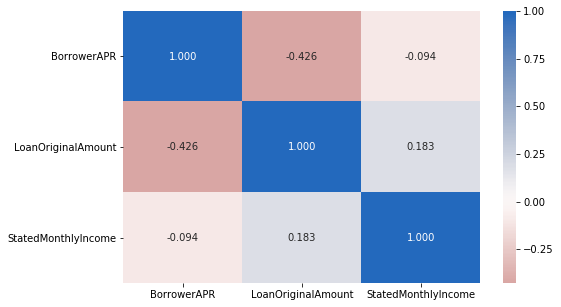

In [29]:
plt.figure(figsize = [8, 5])
sb.heatmap(new_df[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0);

C:\Users\Hp\Anaconda3\lib\site-packages\pandas\core\indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
C:\Users\Hp\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Hp\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


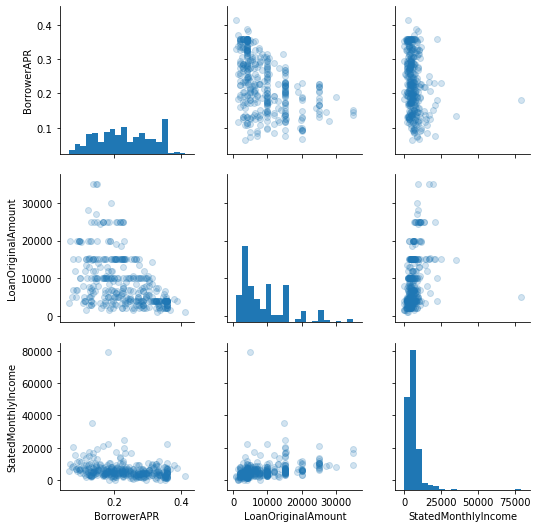

In [30]:
samples = np.random.choice(new_df.shape[0], 500, replace = False)
df_samp = new_df.loc[samples,:]
g = sb.PairGrid(data = df_samp, vars = numeric_vars);
g = g.map_diag(plt.hist, bins = 20)
g.map_offdiag(plt.scatter, alpha = 1/5);

We can see the correlation coefficient between Interest rate and Loan Original Amount is -0.426 and its shown negativily in the chart. The Loan Original Amount is positively correlated with the Stated Monthly Income, it makes sense since borrowers with more monthly income could loan more money

> I would like to look how the **Term** play into the relationship between **Interest rate (BorrowerRate)** and **loan original amount**.

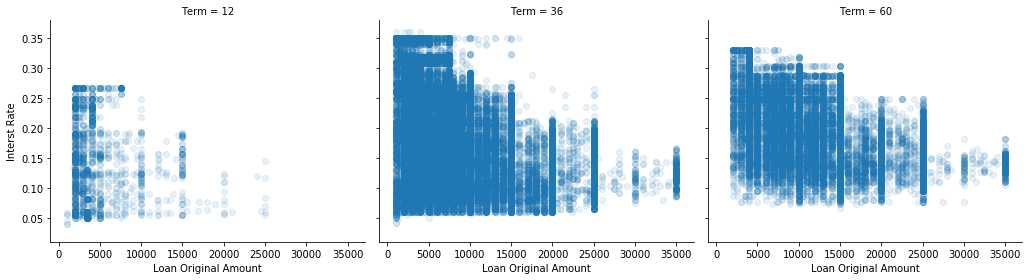

In [31]:
g = sb.FacetGrid(data = new_df, aspect=1.2, height=4, col = 'Term', col_wrap = 3)
g.map(sb.regplot, 'LoanOriginalAmount', 'BorrowerRate', x_jitter=0.04, fit_reg = False, scatter_kws={'alpha':1/10})
g.set_xlabels('Loan Original Amount')
g.set_ylabels('Interst Rate')
plt.show()

We cna see there isn't an effect relationship but we can notice that a lot of people who takes 12 months loan the amount is 5K the majority is 36 months but the 60 months is for the amount 10K and more and and that makes sense no one will take a high loan and pay it in 12 months!

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> There is a negative relationship between Interest rate and Loan Original Amount. And there is a positive relationship between  Loan Original Amount and Stated Monthly Income. 

### Were there any interesting or surprising interactions between features?

> The people who takes 12 months loan the amount is 5K and less the majority are taking 36 months but the 60 months is for the amount 6K and more.

### Store the cleaned data into a CSV file to use it in the presentation step.

In [32]:
new_df.to_csv('new_df.csv', index = False)

### Refrences 
>- https://matplotlib.org/contents.html
- https://seaborn.pydata.org/